In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
data.shape

(768, 9)

In [41]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are many irregularites in the data\

1. we can see the minimum in Pregnancies, Glucose, BloodPressure, SkinThickness, insulin and BMI which is zero and practically it is not possible
2. Standard Deveation of Insulin is higher than mean.


In [42]:
# We need to replace the zeros with mean

data['Pregnancies'] = data['Pregnancies'].replace(0,data['Pregnancies'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())


In [43]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


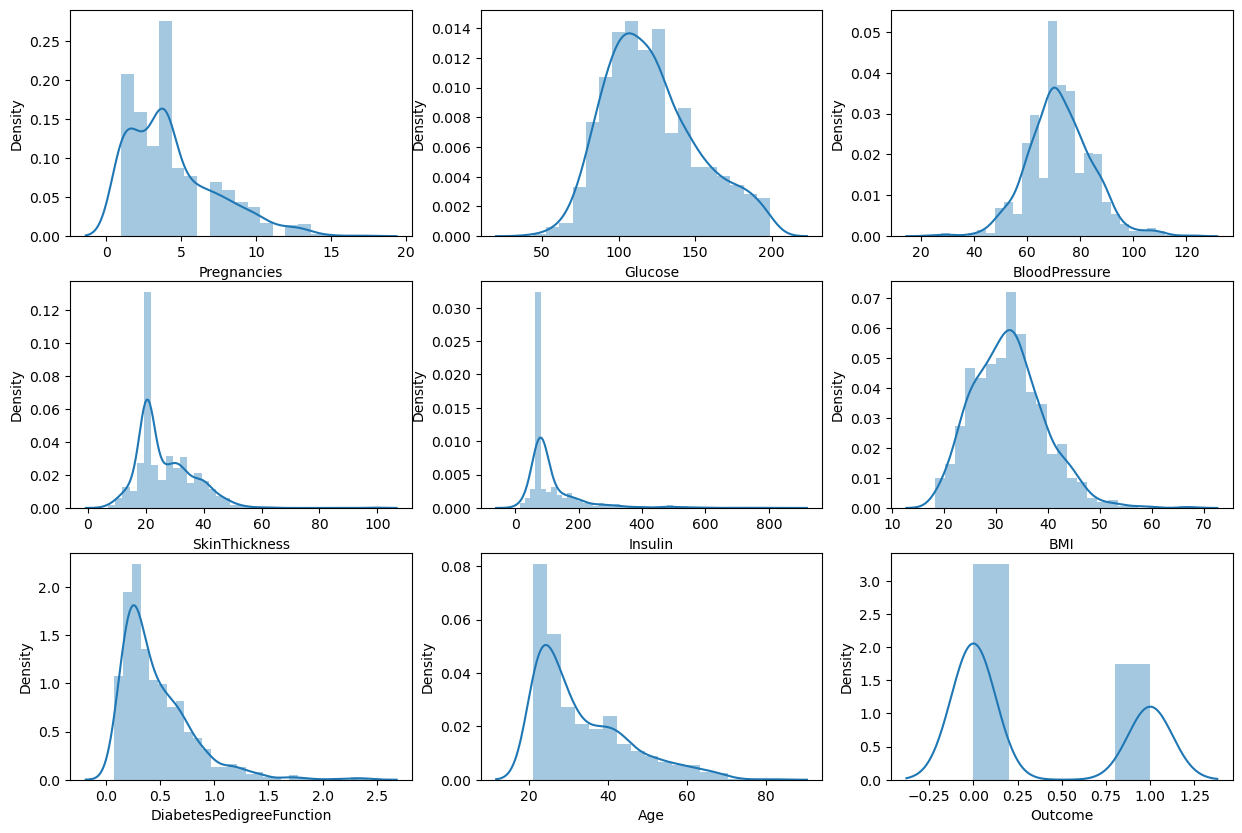

In [44]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()    

In [45]:
data_features = data.drop(columns=['Outcome'],axis=1)

We can see there is skewness in the data in multiple column

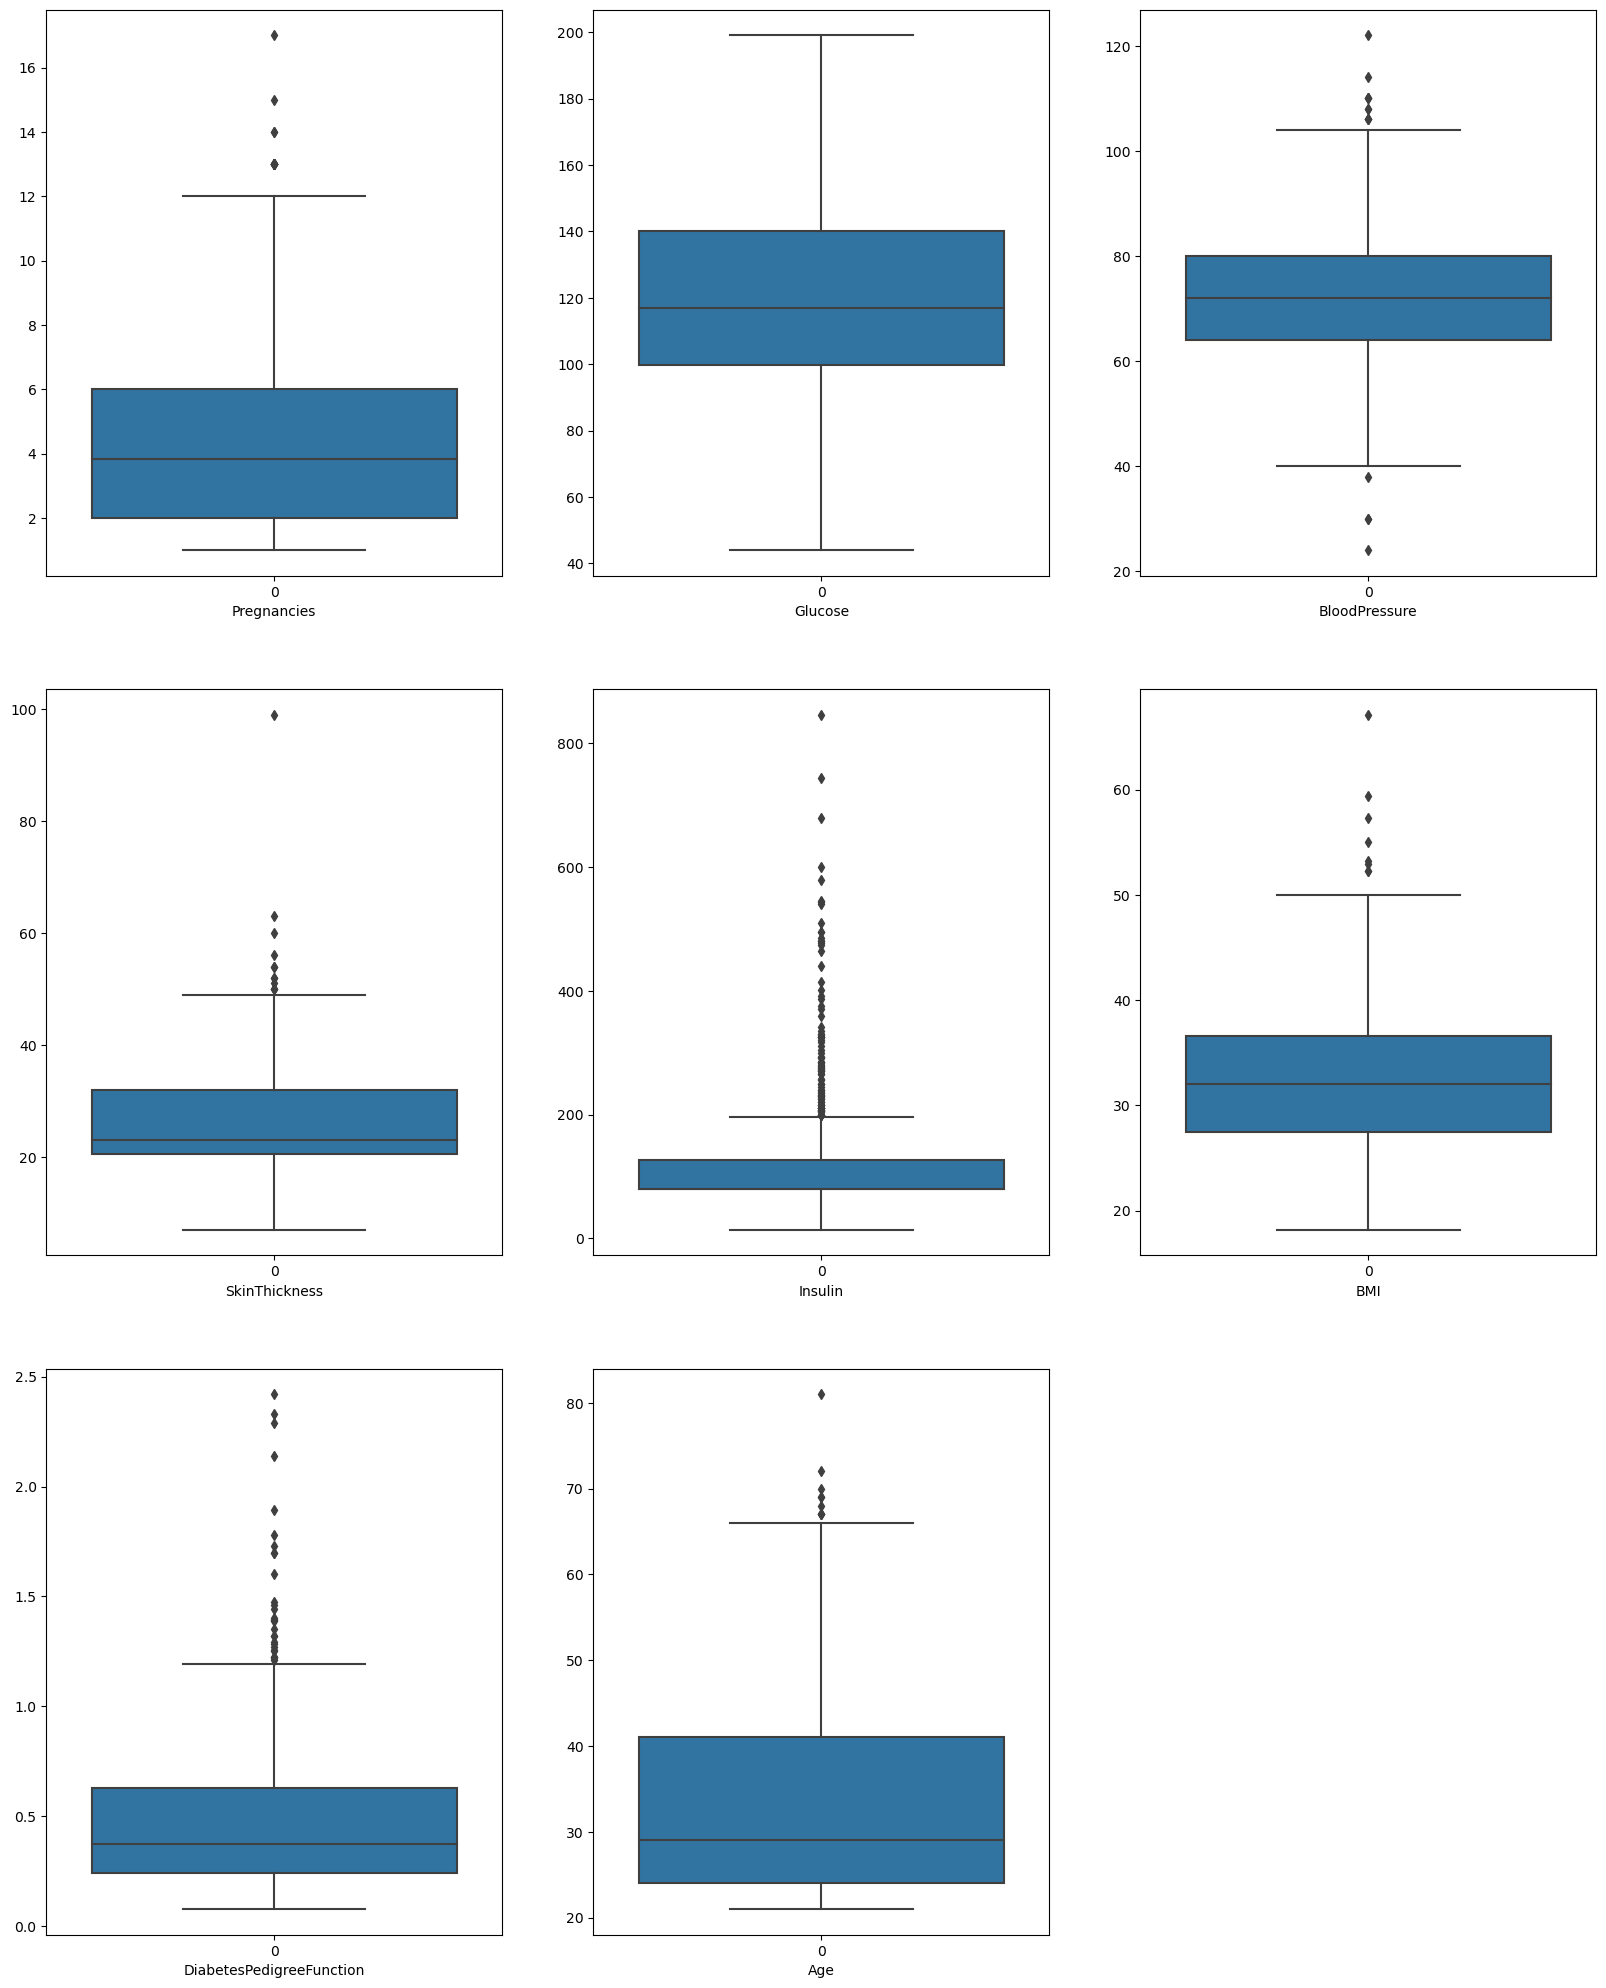

In [46]:
# Now we need to check the outliers from the data

plt.figure(figsize = (20,25))
plotnumber=1
for i in data_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data =data_features[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()    

So we found some outliers in the data so we nee to treat them and delete the outliers from our data

In [47]:
q1 = data.quantile(0.25)

q3 = data.quantile(0.75)

iqr = q3-q1



In [48]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [49]:
high_preg = q3.Pregnancies+(1.5*iqr.Pregnancies)
high_preg

12.0

In [50]:
index_ = np.where(data['Pregnancies']>high_preg)
index_

(array([ 28,  72,  86,  88, 159, 274, 298, 323, 357, 455, 518, 635, 691,
        744], dtype=int64),)

In [51]:
data = data.drop(data.index[index_])
data.shape


(754, 9)

In [52]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [53]:
high_bp = q3.BloodPressure+(1.5*iqr.BloodPressure)

index_highbp=np.where(data['BloodPressure']>high_bp)
print(index_highbp)

(array([ 42,  82, 102, 172, 353, 538, 646, 650, 660], dtype=int64),)


In [54]:
data = data.drop(data.index[index_highbp])
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
740,763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
741,764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
742,765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
743,766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [55]:
low_Bp = q1.BloodPressure-(1.5*iqr.BloodPressure)
low_Bp


40.0

In [56]:
indexbp = np.where(data['BloodPressure']<low_Bp)
indexbp

(array([ 18, 118, 580, 582], dtype=int64),)

In [57]:
data=data.drop(data.index[indexbp])

data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
736,763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
737,764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
738,765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
739,766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [58]:
high_skinthik = q3.SkinThickness +(1.5*iqr.SkinThickness)
high_skinthik


49.1953125

In [59]:
index_skin = np.where(data['SkinThickness']>high_skinthik)

data = data.drop(data.index[index_skin])

data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
725,763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
726,764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
727,765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
728,766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [60]:
high_inslin = q3.Insulin+(1.5*iqr.Insulin)
high_inslin

198.42578125

In [61]:
index_inslin = np.where(data['Insulin']>high_inslin)

data = data.drop(data.index[index_inslin])

data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
640,763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
641,764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
642,765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
643,766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [62]:
high_BMI=q3.BMI+(1.5*iqr.BMI)
high_BMI

50.25

In [63]:
index_BMI = np.where(data['BMI']>high_BMI)

data= data.drop(data.index[index_BMI])

data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
638,763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
639,764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
640,765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
641,766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [64]:
high_Dia=q3.DiabetesPedigreeFunction+(1.5*iqr.DiabetesPedigreeFunction)
high_Dia

1.2

In [65]:
index_dia = np.where(data['DiabetesPedigreeFunction']>high_Dia)

data= data.drop(data.index[index_dia])

data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
615,763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
616,764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
617,765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
618,766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [66]:
high_age=q3.Age+(1.5*iqr.Age)
high_age

66.5

In [67]:
index_age = np.where(data['Age']>high_age)

data= data.drop(data.index[index_age])

data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
606,763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
607,764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
608,765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
609,766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


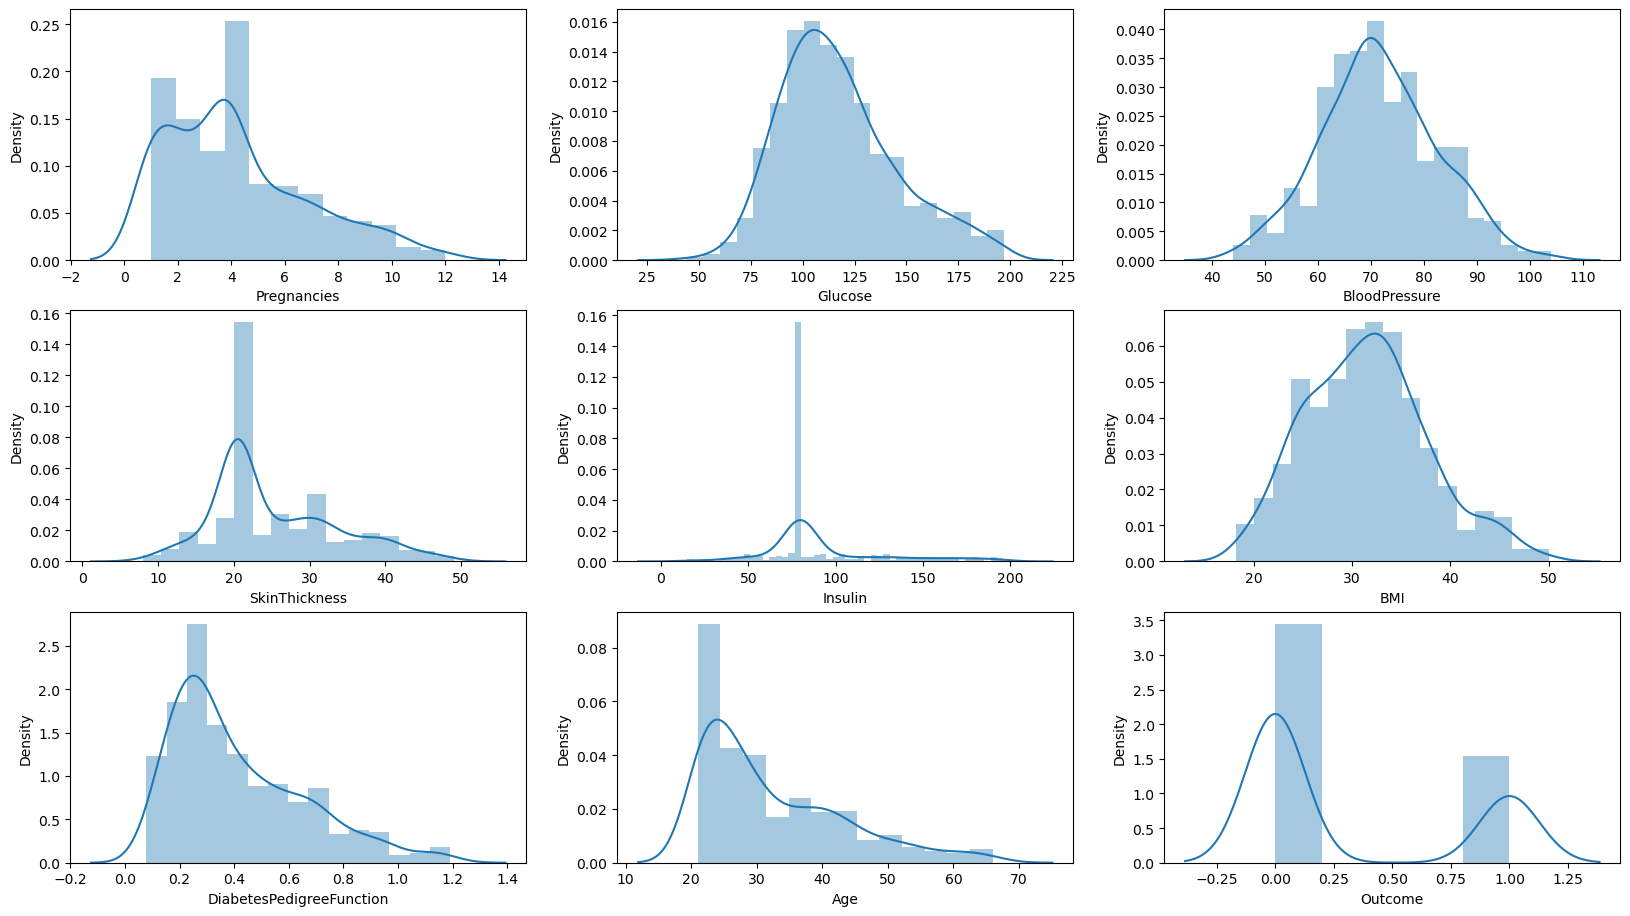

In [68]:
plt.figure(figsize=(20,15))
plotnumber =1
for i in data:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()    

In [69]:
x = data.drop(columns =['Outcome'])
y = data['Outcome']

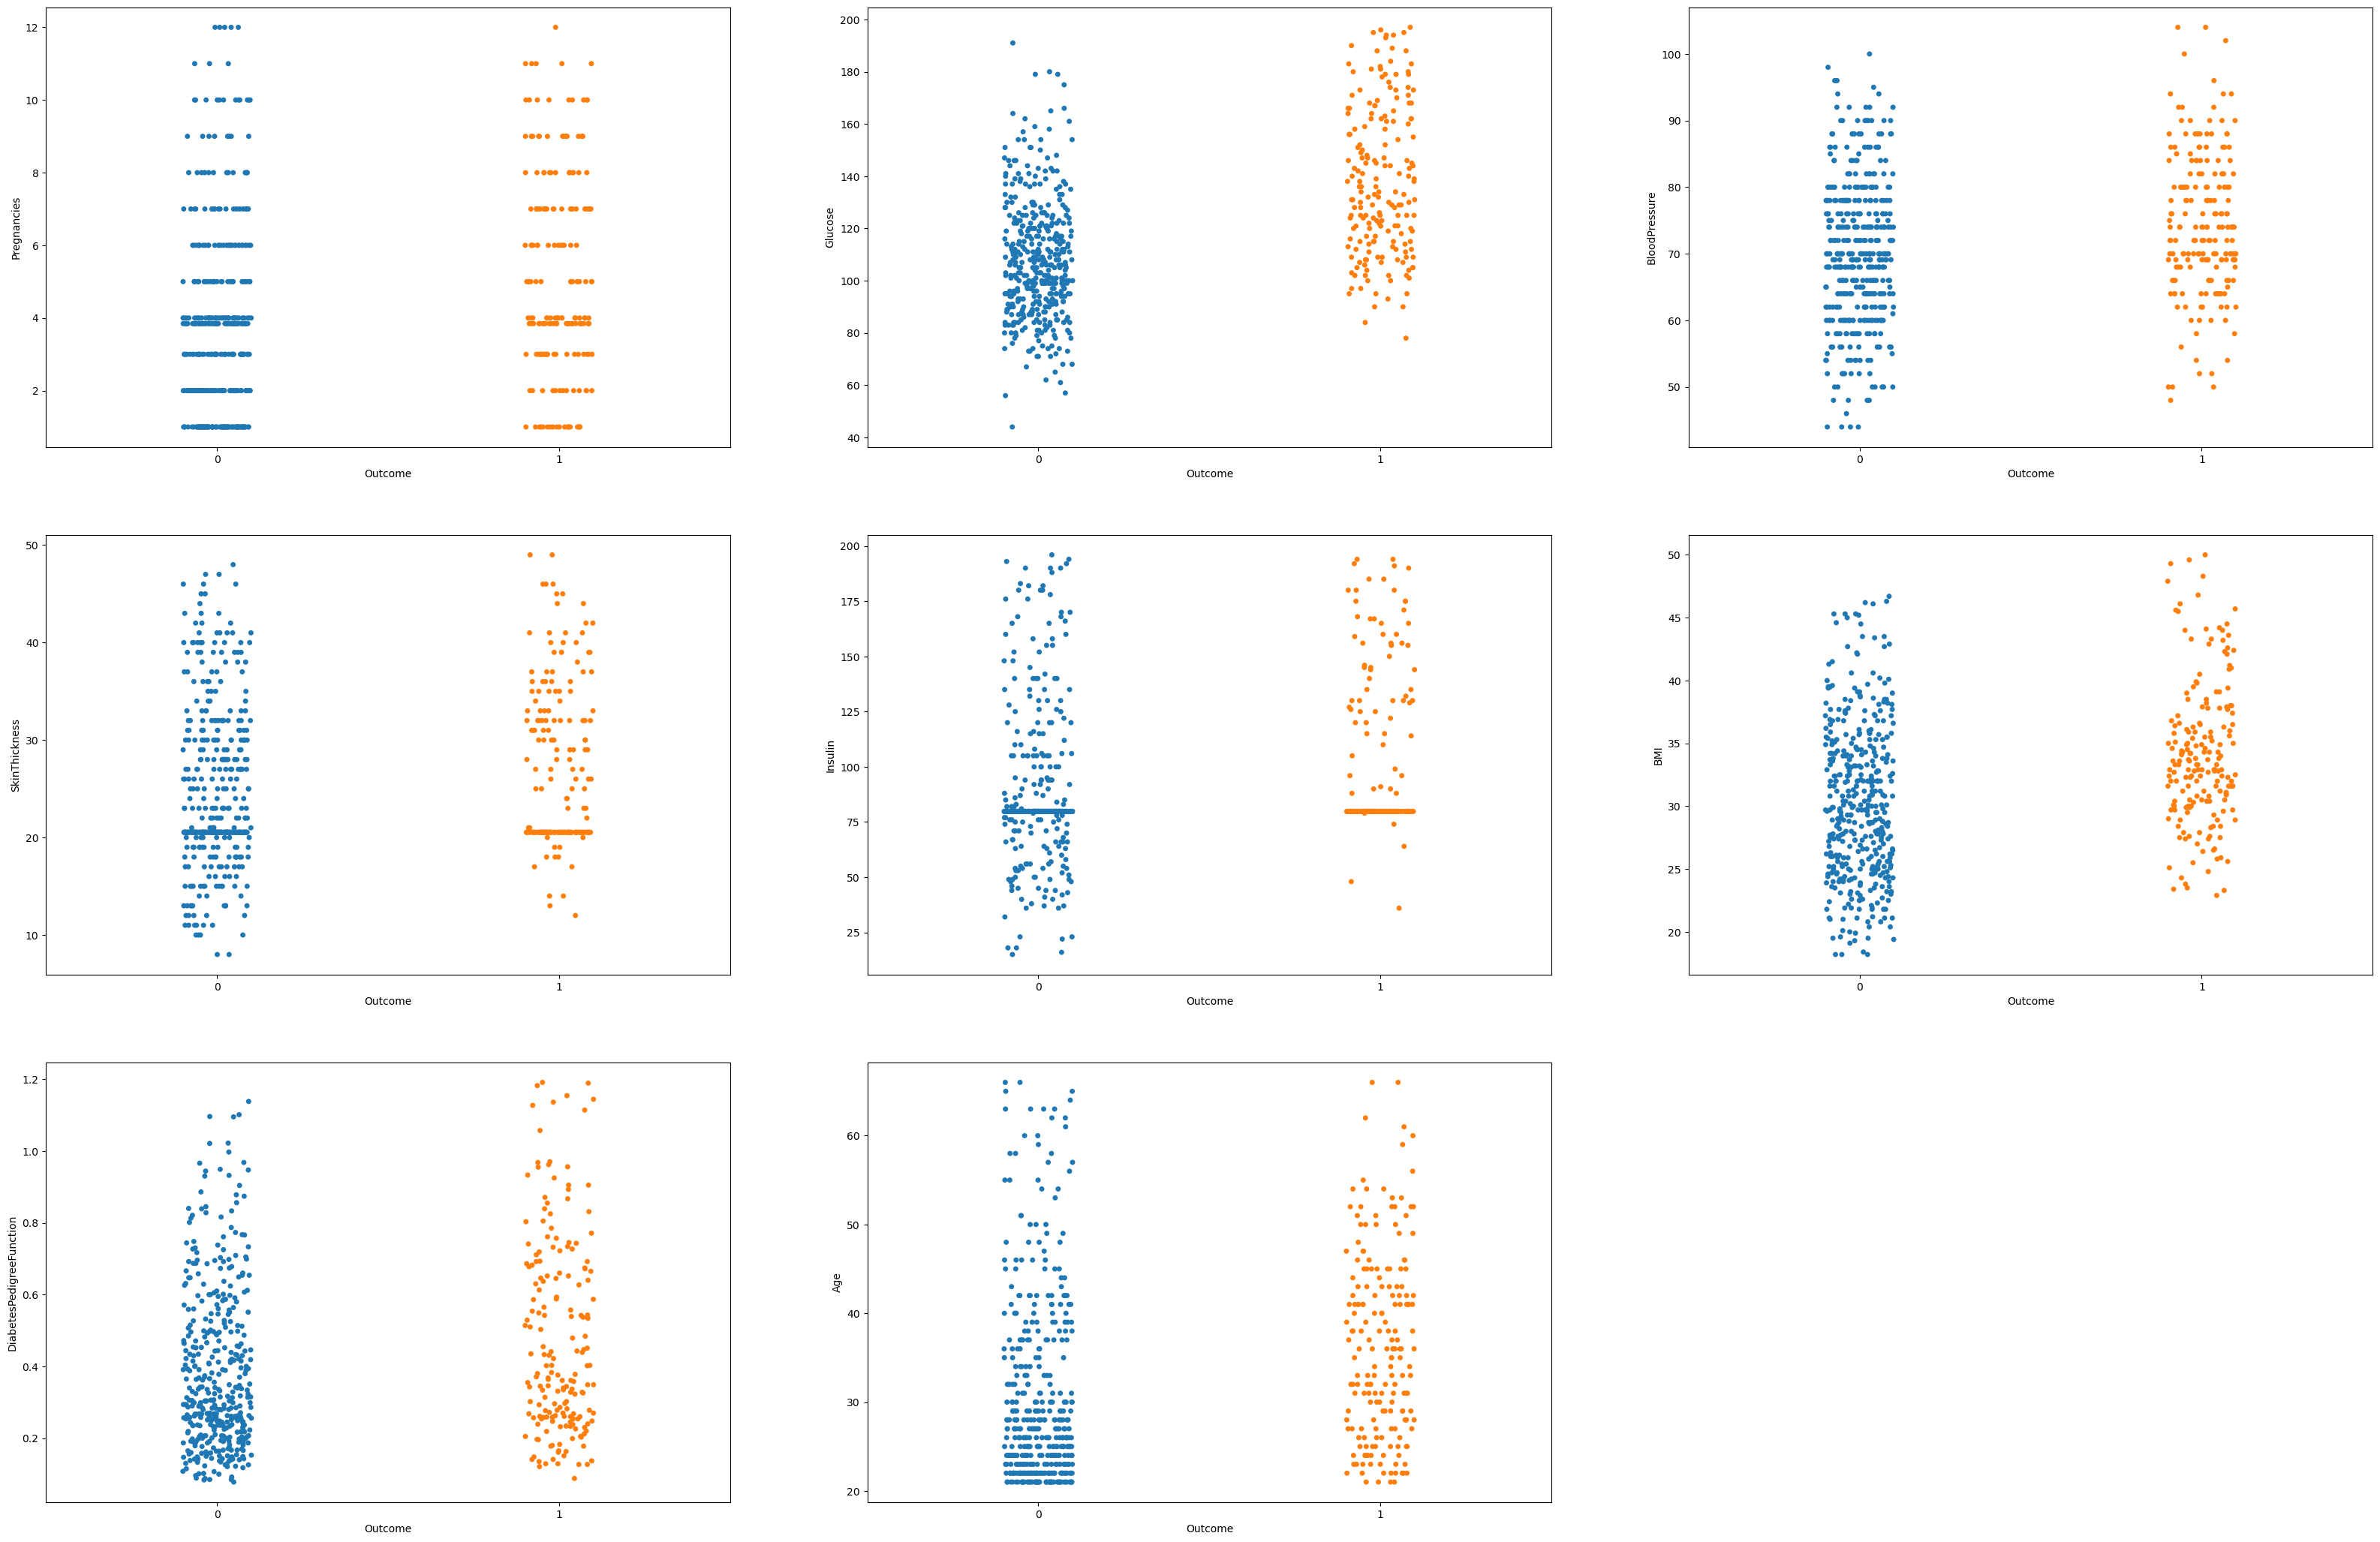

In [70]:
plt.figure(figsize=(40,35))
plotnumber =1
for i in x:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.stripplot(y,x[i])
    plotnumber+=1
plt.show()    

In [71]:
x_scaled = StandardScaler()

scaled = x_scaled.fit_transform(x)

In [72]:
scaled.shape[1]

8

In [73]:
vif = pd.DataFrame()
vif['features'] = x.columns
vif['vif']= [variance_inflation_factor(scaled,i)for i in range(scaled.shape[1])]

vif

,features,vif
0,Pregnancies,1.416101
1,Glucose,1.252097
2,BloodPressure,1.259582
3,SkinThickness,1.423592
4,Insulin,1.206909
5,BMI,1.461447
6,DiabetesPedigreeFunction,1.037288
7,Age,1.577794


In [88]:
x_train,x_test,y_train,y_test = train_test_split(scaled,y,test_size=0.20,random_state=234)

In [89]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [92]:
y_pred = lr.predict(x_test)


In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [94]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7560975609756098

In [95]:
confsion_matrix = confusion_matrix(y_test,y_pred)
confsion_matrix

array([[72, 11],
       [19, 21]], dtype=int64)

# Similarly we can manually calculate recall/precision/F1 score                  

In [97]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83        83
           1       0.66      0.53      0.58        40

    accuracy                           0.76       123
   macro avg       0.72      0.70      0.71       123
weighted avg       0.75      0.76      0.75       123



In [100]:
tpr,fpr,thresholds = roc_curve(y_test,y_pred)

In [101]:
print('True Positive Rate :',tpr )
print('False Positive Rate :',fpr )
print('Thresholds :', thresholds)

True Positive Rate : [0.         0.13253012 1.        ]
False Positive Rate : [0.    0.525 1.   ]
Thresholds : [2 1 0]
